In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

In [2]:
data = pd.read_csv('PUBG_WIN_OR_LOSE_DATASET.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [89]:
data.isna().sum() # 결측치 합계

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [4]:
temp = data.loc[data['winPlacePerc'].notnull()]
temp.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [5]:
temp_id_remove = temp.loc[:, 'assists' :]
temp_id_remove.drop('matchType', axis = 1, inplace = True)

In [6]:
for column_name in temp_id_remove : # t-test
    print(f"{column_name} : ".ljust(20),spst.pearsonr(temp_id_remove[column_name], temp_id_remove['winPlacePerc']))

assists :            PearsonRResult(statistic=0.2994408892598539, pvalue=0.0)
boosts :             PearsonRResult(statistic=0.6342342507380694, pvalue=0.0)
damageDealt :        PearsonRResult(statistic=0.44050679763368794, pvalue=0.0)
DBNOs :              PearsonRResult(statistic=0.2799696924174957, pvalue=0.0)
headshotKills :      PearsonRResult(statistic=0.27772246274102796, pvalue=0.0)
heals :              PearsonRResult(statistic=0.42785698570252134, pvalue=0.0)
killPlace :          PearsonRResult(statistic=-0.7190689184926048, pvalue=0.0)
killPoints :         PearsonRResult(statistic=0.012908088775843629, pvalue=3.617128536073139e-163)
kills :              PearsonRResult(statistic=0.41991598708955025, pvalue=0.0)
killStreaks :        PearsonRResult(statistic=0.37756645960730784, pvalue=0.0)
longestKill :        PearsonRResult(statistic=0.41015355970609413, pvalue=0.0)
matchDuration :      PearsonRResult(statistic=-0.005171314235440617, pvalue=1.0879561963867156e-27)
maxPlace :    

In [3]:
#print(data['matchType'].value_counts()) # squad 만 뽑아내자

squad_data = data.loc[data['matchType'] == 'squad']
print("-"*50)
print("length : ",len(squad_data))
print("-"*50)
print(squad_data.isna().sum() if squad_data.isna().all().sum() else "not null")

--------------------------------------------------
length :  626526
--------------------------------------------------
not null


In [4]:
squad_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [36]:
#print(squad_data.info())

# 승률 예측시 필요없는 열 삭제
# Id groupId matchId matchType matchDuration maxPlace killPoints winPoints rankPoints REMOVE
remove_list = ['Id', 'groupId', 'matchId', 'matchType', 'matchDuration', 'maxPlace', 'killPoints', 'winPoints', 'rankPoints']
temp_data = squad_data.copy()
temp_data.drop(remove_list, axis = 1, inplace=True)
    
print(temp_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626526 entries, 8 to 4446952
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   assists          626526 non-null  int64  
 1   boosts           626526 non-null  int64  
 2   damageDealt      626526 non-null  float64
 3   DBNOs            626526 non-null  int64  
 4   headshotKills    626526 non-null  int64  
 5   heals            626526 non-null  int64  
 6   killPlace        626526 non-null  int64  
 7   kills            626526 non-null  int64  
 8   killStreaks      626526 non-null  int64  
 9   longestKill      626526 non-null  float64
 10  numGroups        626526 non-null  int64  
 11  revives          626526 non-null  int64  
 12  rideDistance     626526 non-null  float64
 13  roadKills        626526 non-null  int64  
 14  swimDistance     626526 non-null  float64
 15  teamKills        626526 non-null  int64  
 16  vehicleDestroys  626526 non-null  int

In [28]:
# 다중공선성 : 값 10이 넘어가면 다중공선성이 있다고 판단된다 
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, column in enumerate(temp_data) :
    print(f"{column} : ".ljust(20),variance_inflation_factor(temp_data.values, i))
             

assists :            1.5544060364001802
boosts :             3.3641905486449737
damageDealt :        9.689514251779691
DBNOs :              7.271416317719605
headshotKills :      2.0885725565075526
heals :              1.898453470288001
killPlace :          24.25170281945989
kills :              11.578579294931394
killStreaks :        8.118642244344986
longestKill :        2.0259437969135514
numGroups :          55.38616928636637
revives :            1.3269847159520507
rideDistance :       1.5828501630333154
roadKills :          1.023590248374071
swimDistance :       1.0546053462730987
teamKills :          1.0677501043947581
vehicleDestroys :    1.0544188109524288
walkDistance :       7.074804172973685
weaponsAcquired :    5.770067381892593
winPlacePerc :       13.989922785235143


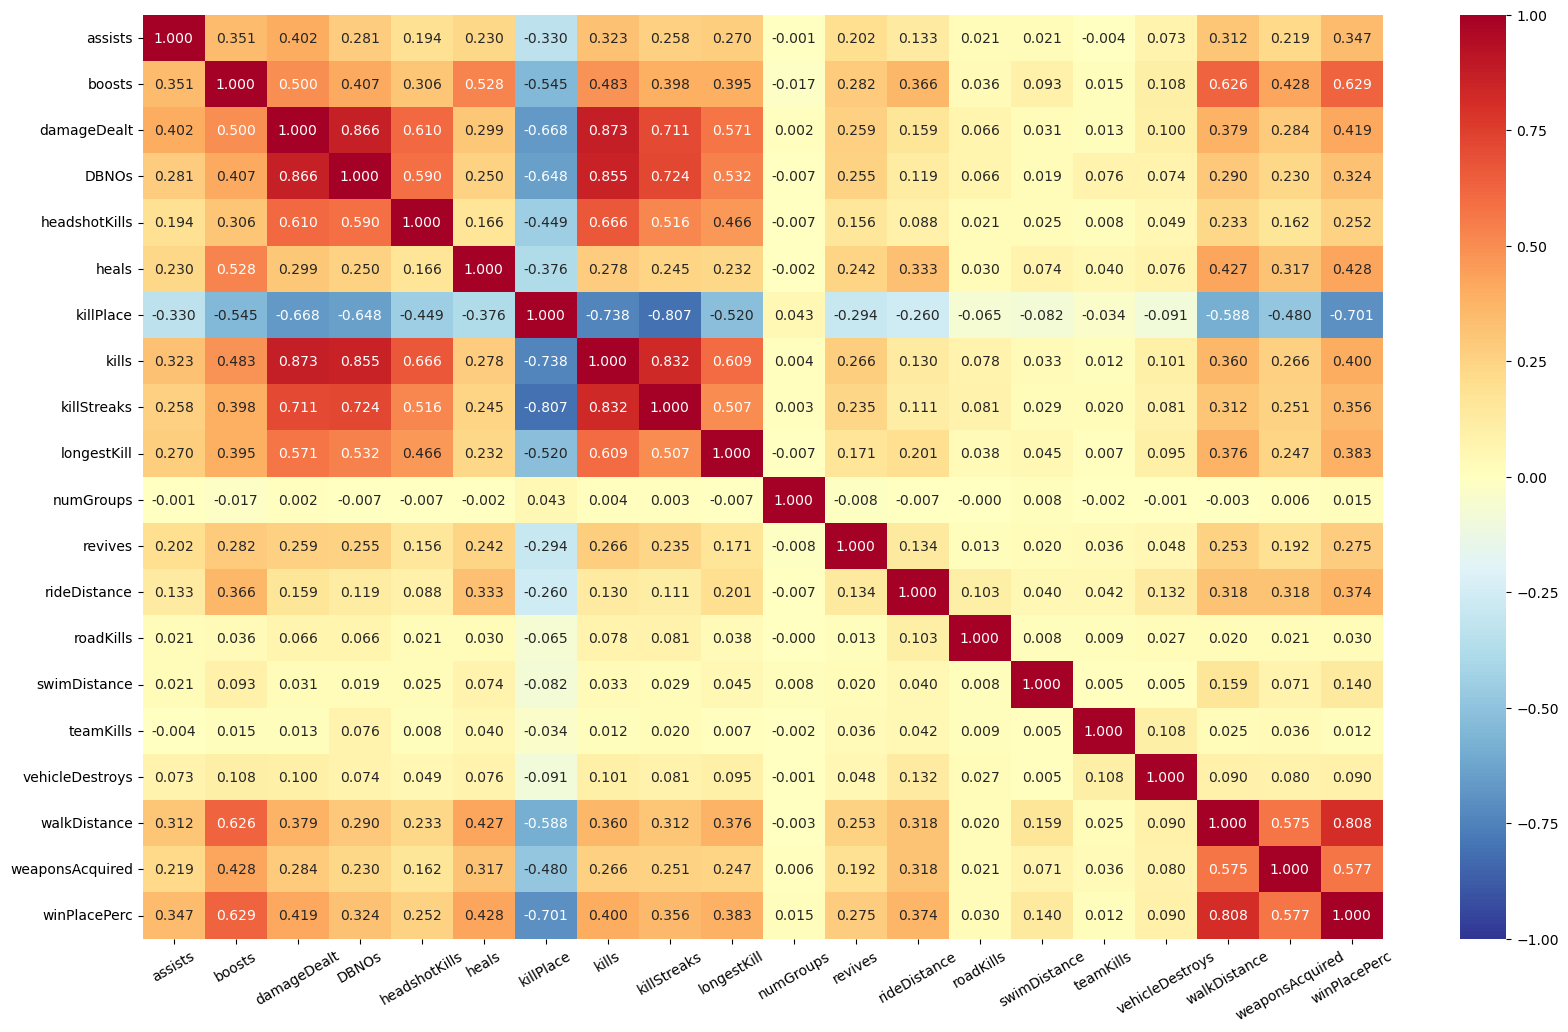

In [30]:
plt.figure(figsize = (20, 12))
sns.heatmap(temp_data.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.xticks(rotation = 30)
plt.show()

In [37]:
temp_data_2 = temp_data.copy()
remove_list = ['numGroups', 'killPlace', 'damageDealt', 'killStreaks', 'DBNOs', 'walkDistance']

temp_data_2.drop(remove_list, axis = 1, inplace = True)

# 다중공선성 - > 최종 변수 선택
for i, column in enumerate(temp_data_2) :
    print(f"{column} : ".ljust(20),variance_inflation_factor(temp_data_2.values, i))

assists :            1.463956025256701
boosts :             3.0896010211100466
headshotKills :      2.050968059715074
heals :              1.8850258127617265
kills :              3.5158773256026623
longestKill :        1.990140569348531
revives :            1.3204959292040477
rideDistance :       1.5702974397535394
roadKills :          1.0226138140296839
swimDistance :       1.046840462595382
teamKills :          1.0402673885509044
vehicleDestroys :    1.051333405618651
weaponsAcquired :    4.199006082151863
winPlacePerc :       5.904053763109845


In [77]:
data_input = temp_data_2.loc[:,:'winPlacePerc']
#data_input = data_input.astype('float64') # float -> int

data_target = temp_data_2.loc[:,'winPlacePerc']

print(data_input.info())
print("-"*50)
print(data_target.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626526 entries, 8 to 4446952
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   assists          626526 non-null  int64  
 1   boosts           626526 non-null  int64  
 2   headshotKills    626526 non-null  int64  
 3   heals            626526 non-null  int64  
 4   kills            626526 non-null  int64  
 5   longestKill      626526 non-null  float64
 6   revives          626526 non-null  int64  
 7   rideDistance     626526 non-null  float64
 8   roadKills        626526 non-null  int64  
 9   swimDistance     626526 non-null  float64
 10  teamKills        626526 non-null  int64  
 11  vehicleDestroys  626526 non-null  int64  
 12  weaponsAcquired  626526 non-null  int64  
 13  winPlacePerc     626526 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 71.7 MB
None
--------------------------------------------------
<class 'pandas.core.series.S

In [74]:
# 훈련세트 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, random_state = 42)

In [79]:
# 하이퍼파라미터 튜닝 - LASSO 회귀
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params = { 'alpha' : [0.01, 0.1, 1, 10],
           'max_iter' : [1000,1500,2000,2500]
         }

In [80]:
gs = GridSearchCV(Lasso(), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [1000, 1500, 2000, 2500]})

In [88]:
# 검증점수 가장 높은 모델 파라미터 조합
print(gs.best_params_)

#각 매개변수에서 수행한 교차 검증 평균 점수
print(gs.cv_results_['mean_test_score'])

print("-"*50)

# 가장 좋은 파라미터 조합 모델
dt = gs.best_estimator_
print("test score : ", dt.score(test_input, test_target))

{'alpha': 0.01, 'max_iter': 1000}
[0.98250454 0.98250454 0.98250454 0.98250454 0.49050803 0.49050803
 0.49050803 0.49050803 0.23936162 0.23936162 0.23936162 0.23936162
 0.14009436 0.14009436 0.14009436 0.14009436]
--------------------------------------------------
test score :  0.9824057500160018
